In [51]:
import math as m
import pandas as pd

In [52]:
data=pd.read_csv("Acoustic_Extinguisher_Fire_Dataset.csv")
data

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,lpg,190,86,2.2,5,0
17438,7,lpg,190,84,2.0,4,0
17439,7,lpg,190,80,1.5,3,0
17440,7,lpg,190,76,0.4,2,0


In [53]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
data['FUEL']=en.fit_transform(data['FUEL'])
data

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,10,96,0.0,75,0
1,1,0,10,96,0.0,72,1
2,1,0,10,96,2.6,70,1
3,1,0,10,96,3.2,68,1
4,1,0,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17437,7,2,190,86,2.2,5,0
17438,7,2,190,84,2.0,4,0
17439,7,2,190,80,1.5,3,0
17440,7,2,190,76,0.4,2,0


In [54]:
target=data.iloc[:,-1].values
input_data=data.iloc[:,:-1].values

In [55]:
from sklearn.preprocessing import normalize
input_data = normalize(input_data)

In [56]:
def weight(g=1, h=0, weights=None):
    lr = g
    bias = h
    if weights is None:
        # Initialize weights for 34 features plus bias
        weights = [0.3] * 6
    return lr, bias, weights

l = 1
thre = 0.5

def sigmoid(x):
    s_g = 1 / (1 + m.e**(-l * x))
    return s_g

def binary(x):
    if x>0.6:
        return 1
    else:
        return 0

def perceptron(i, t):
    lr, bias, weights = weight()
    y_in = bias + sum(w * x for w, x in zip(weights[1:], i)) 
    Y = sigmoid(y_in)
    
    if Y == t:
        return Y
    else:
        for j in range(len(weights) - 1):
            weights[j+1] += lr * t * i[j]
        bias += lr * t
        weight(1, bias, weights)
        return Y


In [57]:
c = 0
while True:
    re = []
    for j in range(len(input_data)):
        re.append(perceptron(input_data[j], target[j]))
    c += 1
    match = all(re[j] == target[j] for j in range(len(re)))

    if match or c == 100:
        break


In [58]:
result =[]
for i in re:
    result.append(binary(i))
result

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [59]:
from sklearn.metrics import accuracy_score
print(f'Accuracy : {accuracy_score(result,target)*100:.2f} %')

Accuracy : 52.09 %


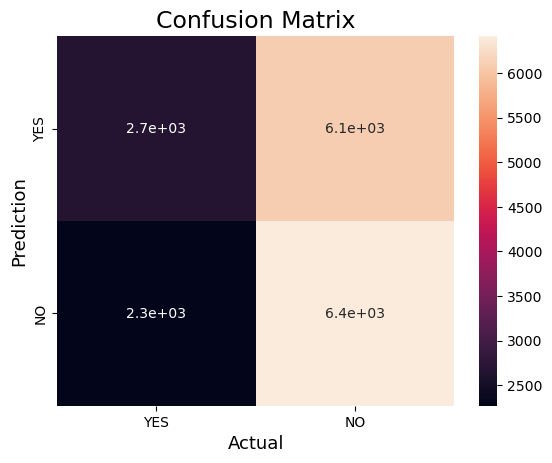

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target,result)
sns.heatmap(cm,
            annot=True,
            xticklabels=['YES','NO'],
            yticklabels=['YES','NO'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()